In [1]:
# Importing things 
import numpy as np
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt

import matplotlib.patches as mpatches

import matplotlib.ticker as mticker
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.ticker import ScalarFormatter

import matplotlib.colors as colors
from matplotlib.colors import ListedColormap
from matplotlib.colors import LogNorm
from matplotlib.colors import Normalize

from scipy.ndimage import gaussian_filter

from matplotlib.gridspec import GridSpec

## Plotting preferences

In [3]:
# Font sizes
axis_label_font = 30
axis_numbers_font = 25
title_font = 50
legend_font = 50

path = '/Users/audreyburggraf/Desktop/THESIS/Figures/'

In [4]:
detection_colours = sns.color_palette("hls", 4)
detection_colours

[(0.86, 0.3712, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86)]

In [5]:
dark_colours = sns.color_palette("viridis", 8)
dark_colours

[(0.281412, 0.155834, 0.469201),
 (0.244972, 0.287675, 0.53726),
 (0.190631, 0.407061, 0.556089),
 (0.147607, 0.511733, 0.557049),
 (0.119699, 0.61849, 0.536347),
 (0.20803, 0.718701, 0.472873),
 (0.430983, 0.808473, 0.346476),
 (0.709898, 0.868751, 0.169257)]

In [6]:
my_colours = sns.color_palette("husl", 8)
my_colours

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.8087954113106306, 0.5634700050056693, 0.19502642696727285),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.19783576093349015, 0.6955516966063037, 0.3995301037444499),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.22335772267769388, 0.6565792317435265, 0.8171355503265633),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]

In [7]:
cmap_reds = ListedColormap(plt.cm.get_cmap('Reds', 10)(np.arange(10)))
cmap_greens = ListedColormap(plt.cm.get_cmap('Greens', 10)(np.arange(10)))
cmap_purples = ListedColormap(plt.cm.get_cmap('Purples', 10)(np.arange(10)))

In [8]:
alpha = 0.7

## Data 

In [9]:
# Importing data file 
df = pd.read_csv('/Users/audreyburggraf/Desktop/THESIS/Data Files/bigrun_10000_after_changes.csv')
df

,Inj.0P alpha0,Inj.0P delta0,Inj.0P pmra,Inj.0P pmdec,Inj.0P prlx,Inj.1P alpha0,Inj.1P delta0,Inj.1P pmra,Inj.1P pmdec,Inj.1P prlx,...,Condition 4,Detection,Astrometric Signature,Stellar Mass,Scaling Factor,Distance,Semi-Major Axis,Sigma fov,Noise,S/N
0,288.503923,-68.088209,-44.551743,-37.022875,10.061523,288.503923,-68.088209,-44.551743,-37.022875,10.061523,...,0,0,56.262094,0.154116,1.272583,99.388534,1.136793,333.149854,471.145042,0.151966
1,138.039973,-3.377097,-163.019718,-32.490641,11.956663,138.039973,-3.377097,-163.019718,-32.490641,11.956663,...,0,0,1.022224,0.302706,10.244061,83.635376,0.088245,96.705137,136.761717,0.076569
2,286.695890,-0.244781,-3.752077,-4.259140,10.096390,286.695890,-0.244781,-3.752077,-4.259140,10.096390,...,0,0,18.653842,0.078149,21.004269,99.045303,0.021571,427.687033,604.840802,0.647791
3,115.135052,0.740534,26.853094,-84.685793,10.182806,115.135052,0.740534,26.853094,-84.685793,10.182806,...,0,0,36.973503,0.386243,3.250046,98.204759,0.442331,91.103628,128.839986,0.932673
4,262.038776,-14.041731,3.605326,-100.931148,17.001777,262.038776,-14.041731,3.605326,-100.931148,17.001777,...,0,0,0.974203,0.440679,16.434061,58.817380,0.053255,42.230649,59.723156,0.268072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,282.780442,12.718451,8.229683,-11.514563,11.754215,282.780442,12.718451,8.229683,-11.514563,11.754215,...,0,0,223.892367,0.073716,1.132350,85.075868,1.038787,642.528879,908.673054,0.279005
9996,24.961276,20.537176,47.458743,-84.013850,16.444935,24.961276,20.537176,47.458743,-84.013850,16.444935,...,0,0,17.471990,0.519612,3.435857,60.808996,0.453412,38.329614,54.206261,1.107460
9997,174.263014,-4.139514,20.895641,-87.415298,12.324102,174.263014,-4.139514,20.895641,-87.415298,12.324102,...,0,0,9.774783,0.175999,18.785303,81.141817,0.032814,167.592378,237.011414,0.774740
9998,288.104504,-29.673692,5.719830,-123.392905,11.458365,288.104504,-29.673692,5.719830,-123.392905,11.458365,...,0,0,7.164172,0.263144,11.641484,87.272488,0.071018,113.439746,160.428028,0.519869


In [10]:
df.columns

Index(['Inj.0P alpha0', 'Inj.0P delta0', 'Inj.0P pmra', 'Inj.0P pmdec',
       'Inj.0P prlx', 'Inj.1P alpha0', 'Inj.1P delta0', 'Inj.1P pmra',
       'Inj.1P pmdec', 'Inj.1P prlx', 'Inj.1P e', 'Inj.1P omega',
       'Inj.1P Omega', 'Inj.1P cosi', 'Inj.1P log(m_p)', 'Inj.1P log(P)',
       'Inj.1P tp', 'Rec.0P alpha0', 'Rec.0P delta0', 'Rec.0P pmra',
       'Rec.0P pmdec', 'Rec0P prlx', 'Rec.1P alpha0', 'Rec.1P delta0',
       'Rec.1P pmra', 'Rec.1P pmdec', 'Rec.1P prlx', 'Rec.1P e',
       'Rec.1P omega', 'Rec.1P Omega', 'Rec.1P cosi', 'Rec.1P log(m_p)',
       'Rec.1P log(P)', 'Rec.1P tp', 'np_chi_sq', 'wp_chi_sq', 'npBIC',
       'wpBIC', 'DeltaBIC', 'Condition 1', 'Condition 2', 'Condition 3',
       'Condition 4', 'Detection', 'Astrometric Signature', 'Stellar Mass',
       'Scaling Factor', 'Distance', 'Semi-Major Axis', 'Sigma fov', 'Noise',
       'S/N'],
      dtype='object')

In [93]:
# Data in non-log units
inj_mass_data   = 10**df['Inj.1P log(m_p)'] # [M_J]
inj_period_data = 10**df['Inj.1P log(P)'] # [years]

rec_mass_data   = 10**df['Rec.1P log(m_p)'] # [M_J]
rec_period_data = 10**df['Rec.1P log(P)'] # [years]

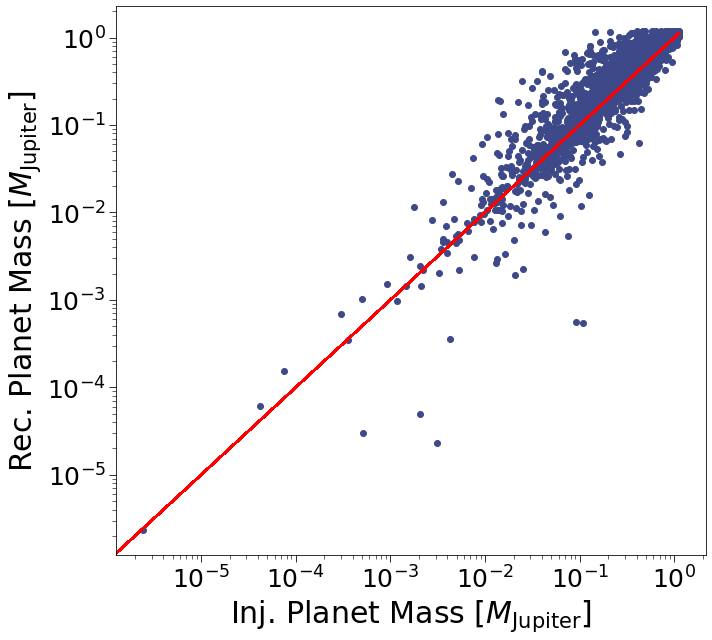

In [94]:
# Injecton and recovery plot: M_p
fig, axs = plt.subplots(1, 1, figsize=(10,9))

# Plot scatter for mass
axs.scatter(df['Inj.1P log(m_p)'], 
               df['Rec.1P log(m_p)'],
               color = dark_colours[1])

# Plot line for mass
axs.plot(df['Inj.1P log(m_p)'], 
            df['Inj.1P log(m_p)'],
            color = 'red',
            lw = 2)

# Plot titles
# axs.set_title('Planet Mass [$\log_{10}(M_{\mathrm{Jupiter}}$)]', fontsize=title_font)
# axs[1].set_title('Orbital Period [$\log_{10}$(years)]', fontsize=title_font)

axs.set_xlabel('Inj. Planet Mass [$M_{\mathrm{Jupiter}}$]', fontsize=axis_label_font)
axs.set_ylabel('Rec. Planet Mass [$M_{\mathrm{Jupiter}}$]', fontsize=axis_label_font)



# Make axes log
axs.set_xscale('log')
axs.set_yscale('log')
    
    # Make axes decimals and not scientific notation
#     axs.xaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
#     axs.yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
    
# Set axis number size 
axs.tick_params(labelsize=axis_numbers_font, which='major', length=7)
axs.tick_params(which='minor', length=4)

# Add (a)
axs.text(0.05, 0.9, '(a)', transform=axs.transAxes, fontsize=axis_label_font)

# Adjust layout
plt.tight_layout()

plt.savefig(path + 'InjvsRecPlanetMass.pdf', dpi=300)

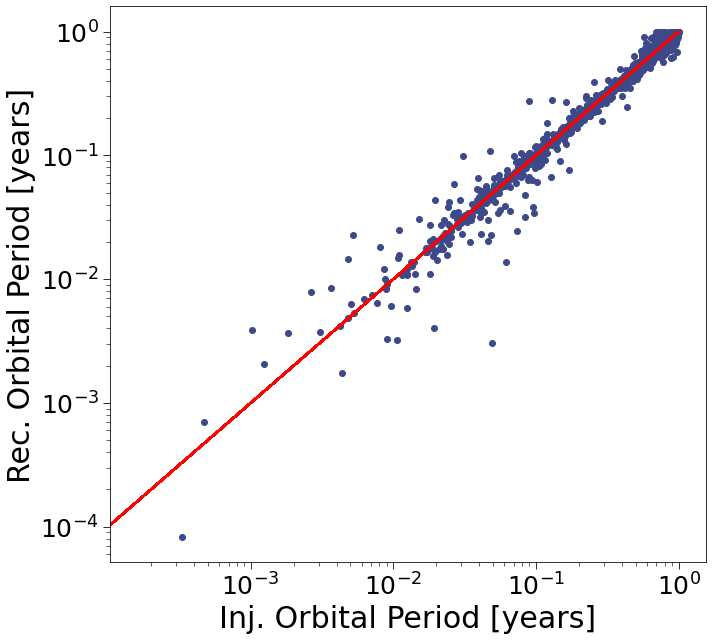

In [96]:
# Injecton and recovery plot: P
fig, axs = plt.subplots(1, 1, figsize=(10,9))

axs.scatter(df['Inj.1P log(P)'], 
               df['Rec.1P log(P)'], 
               color = dark_colours[1])

axs.plot(df['Inj.1P log(P)'], 
            df['Inj.1P log(P)'],
            color = 'red',
            lw = 2)

axs.set_xlabel('Inj. Orbital Period [years]', fontsize=axis_label_font)
axs.set_ylabel('Rec. Orbital Period [years]', fontsize=axis_label_font)

# Make axes log
axs.set_xscale('log')
axs.set_yscale('log')
    
    # Make axes decimals and not scientific notation
#     axs[i].xaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
#     axs[i].yaxis.set_major_formatter(ScalarFormatter(useMathText=True, useOffset=False))
    
# Set axis number size 
axs.tick_params(labelsize=axis_numbers_font, which='major', length=7)
axs.tick_params(which='minor', length=4)

# add (b)
axs.text(0.05, 0.9, '(b)', transform=axs.transAxes, fontsize=axis_label_font)

# Adjust layout
plt.tight_layout()

plt.savefig(path + 'InjvsRecPeriod.pdf', dpi=300)

# Parameter Recovery for the 0-planet fit

In [56]:
# # Injecton and recovery plot: alpha_0

In [57]:
# # Injecton and recovery plot: delta_0

In [58]:
# # Injecton and recovery plot: mu_alpha

In [59]:
# # Injecton and recovery plot: mu_delta

In [60]:
# # Injecton and recovery plot: parallax

# Parameter Recovery for the 1-planet fit 
(without planet mass or orbital period)

In [61]:
# # Injecton and recovery plot: alpha_0

In [62]:
# Injecton and recovery plot: delta_0

In [63]:
# # Create a 2x1 figure of histograms
# fig, axs = plt.subplots(1, 1, figsize=(10,9))

# axs.scatter(df['Inj.1P pmra'], 
#                df['Rec.1P pmra'],
#                color = dark_colours[1])

# axs.plot(df['Inj.1P pmra'], 
#             df['Inj.1P pmra'],
#             color = 'red',
#             lw = 2)


# axs.set_xlabel('Inj.1P $\mu_\\alpha$ [mas/year]', fontsize=axis_label_font)
# axs.set_ylabel('Rec.1P $\mu_\\alpha$ [mas/year]', fontsize=axis_label_font)

    
# # Set axis number size 
# axs.tick_params(labelsize=axis_numbers_font, which='major', length=7)
# axs.tick_params(which='minor', length=4)

# # Add (c)
# axs.text(0.05, 0.9, '(c)', transform=axs.transAxes, fontsize=axis_label_font)

# # Adjust layout
# plt.tight_layout()

# #plt.savefig(path + 'InjvsRecPlanetMass.pdf', dpi=300)

In [64]:
# # Create a 2x1 figure of histograms
# fig, axs = plt.subplots(1, 1, figsize=(10,9))

# axs.scatter(df['Inj.1P pmdec'], 
#                df['Rec.1P pmdec'],
#                color = dark_colours[1])

# axs.plot(df['Inj.1P pmdec'], 
#             df['Inj.1P pmdec'],
#             color = 'red',
#             lw = 2)


# axs.set_xlabel('Inj.1P $\mu_\delta$ [mas/year]', fontsize=axis_label_font)
# axs.set_ylabel('Rec.1P $\mu_\delta$ [mas/year]', fontsize=axis_label_font)

    
# # Set axis number size 
# axs.tick_params(labelsize=axis_numbers_font, which='major', length=7)
# axs.tick_params(which='minor', length=4)

# # Add (d)
# axs.text(0.05, 0.9, '(d)', transform=axs.transAxes, fontsize=axis_label_font)

# # Adjust layout
# plt.tight_layout()

# #plt.savefig(path + 'InjvsRecPlanetMass.pdf', dpi=300)

In [65]:
# # Create a 2x1 figure of histograms
# fig, axs = plt.subplots(1, 1, figsize=(10,9))

# axs.scatter(df['Inj.1P prlx'], 
#                df['Rec.1P prlx'],
#                color = dark_colours[1])

# axs.plot(df['Inj.1P prlx'], 
#             df['Inj.1P prlx'],
#             color = 'red',
#             lw = 2)


# axs.set_xlabel('Inj.1P $\\varpi$ [mas]', fontsize=axis_label_font)
# axs.set_ylabel('Rec.1P $\\varpi$ [mas]', fontsize=axis_label_font)

    
# # Set axis number size 
# axs.tick_params(labelsize=axis_numbers_font, which='major', length=7)
# axs.tick_params(which='minor', length=4)

# # Add (e)
# axs.text(0.05, 0.9, '(e)', transform=axs.transAxes, fontsize=axis_label_font)

# # Adjust layout
# plt.tight_layout()

# #plt.savefig(path + 'InjvsRecPlanetMass.pdf', dpi=300)

In [66]:
# # Create a 2x1 figure of histograms
# fig, axs = plt.subplots(1, 1, figsize=(10,9))

# axs.scatter(df['Inj.1P e'], 
#                df['Rec.1P e'],
#                color = dark_colours[1])

# axs.plot(df['Inj.1P e'], 
#             df['Inj.1P e'],
#             color = 'red',
#             lw = 2)


# axs.set_xlabel('Inj.1P $e$', fontsize=axis_label_font)
# axs.set_ylabel('Rec.1P $e$ ', fontsize=axis_label_font)

    
# # Set axis number size 
# axs.tick_params(labelsize=axis_numbers_font, which='major', length=7)
# axs.tick_params(which='minor', length=4)

# # Add (f)
# axs.text(0.05, 0.9, '(f)', transform=axs.transAxes, fontsize=axis_label_font)

# # Adjust layout
# plt.tight_layout()

# #plt.savefig(path + 'InjvsRecPlanetMass.pdf', dpi=300)

In [67]:
# # Create a 2x1 figure of histograms
# fig, axs = plt.subplots(1, 1, figsize=(10,9))

# axs.scatter(df['Inj.1P omega'], 
#                df['Rec.1P omega'],
#                color = dark_colours[1])

# axs.plot(df['Inj.1P omega'], 
#             df['Inj.1P omega'],
#             color = 'red',
#             lw = 2)


# axs.set_xlabel('Inj.1P $\omega$ [rad]', fontsize=axis_label_font)
# axs.set_ylabel('Rec.1P $\omega$ [rad]', fontsize=axis_label_font)

    
# # Set axis number size 
# axs.tick_params(labelsize=axis_numbers_font, which='major', length=7)
# axs.tick_params(which='minor', length=4)

# # Add (g)
# axs.text(0.05, 0.9, '(g)', transform=axs.transAxes, fontsize=axis_label_font)

# # Adjust layout
# plt.tight_layout()

# #plt.savefig(path + 'InjvsRecPlanetMass.pdf', dpi=300)

In [68]:
# # Create a 2x1 figure of histograms
# fig, axs = plt.subplots(1, 1, figsize=(10,9))

# axs.scatter(df['Inj.1P Omega'], 
#                df['Rec.1P Omega'],
#                color = dark_colours[1])

# axs.plot(df['Inj.1P Omega'], 
#             df['Inj.1P Omega'],
#             color = 'red',
#             lw = 2)


# axs.set_xlabel('Inj.1P $\Omega$ [rad]', fontsize=axis_label_font)
# axs.set_ylabel('Rec.1P $\Omega$ [rad]', fontsize=axis_label_font)

    
# # Set axis number size 
# axs.tick_params(labelsize=axis_numbers_font, which='major', length=7)
# axs.tick_params(which='minor', length=4)

# # Add (h)
# axs.text(0.05, 0.9, '(h)', transform=axs.transAxes, fontsize=axis_label_font)

# # Adjust layout
# plt.tight_layout()

# #plt.savefig(path + 'InjvsRecPlanetMass.pdf', dpi=300)

In [69]:
# # Create a 2x1 figure of histograms
# fig, axs = plt.subplots(1, 1, figsize=(10,9))

# axs.scatter(df['Inj.1P cosi'], 
#                df['Rec.1P cosi'],
#                color = dark_colours[1])

# axs.plot(df['Inj.1P cosi'], 
#             df['Inj.1P cosi'],
#             color = 'red',
#             lw = 2)


# axs.set_xlabel('Inj.1P $\cos i$', fontsize=axis_label_font)
# axs.set_ylabel('Rec.1P $\cos i$', fontsize=axis_label_font)

    
# # Set axis number size 
# axs.tick_params(labelsize=axis_numbers_font, which='major', length=7)
# axs.tick_params(which='minor', length=4)

# # Add (i)
# axs.text(0.05, 0.9, '(i)', transform=axs.transAxes, fontsize=axis_label_font)

# # Adjust layout
# plt.tight_layout()

# #plt.savefig(path + 'InjvsRecPlanetMass.pdf', dpi=300)

In [70]:
# # Create a 2x1 figure of histograms
# fig, axs = plt.subplots(1, 1, figsize=(10,9))

# axs.scatter(df['Inj.1P tp'], 
#                df['Rec.1P tp'],
#                color = dark_colours[1])

# axs.plot(df['Inj.1P tp'], 
#             df['Inj.1P tp'],
#             color = 'red',
#             lw = 2)


# axs.set_xlabel('Inj.1P $t_p$ [years]', fontsize=axis_label_font)
# axs.set_ylabel('Rec.1P $t_p$ [years]', fontsize=axis_label_font)

    
# # Set axis number size 
# axs.tick_params(labelsize=axis_numbers_font, which='major', length=7)
# axs.tick_params(which='minor', length=4)

# # Add (j)
# axs.text(0.05, 0.9, '(j)', transform=axs.transAxes, fontsize=axis_label_font)

# # Adjust layout
# plt.tight_layout()

# #plt.savefig(path + 'InjvsRecPlanetMass.pdf', dpi=300)